In [1]:
#importing libraries

import numpy
import numpy as np
import numpy.linalg as nla
import scipy.linalg as sla
import matplotlib.pyplot as plt
import matplotlib.image
import seaborn as sns
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
#loading files

df_w = pd.read_csv('Weather.csv')
df_rm = pd.read_csv('Random_Matrix.csv', header=None).to_numpy()
img = matplotlib.image.imread('cake.jpg')

#df_w
#df_rm
#plt.figure()
#plt.imshow(img)

In [3]:
#Exercise 1
#drop rows with any null values

df_w.dropna(how='any', inplace=True)
df_w.drop("Local time", inplace=True, axis=1)
df_w

,T,P,H,W
0,-6.1,739.3,69.0,2.0
1,-5.0,737.7,70.0,2.0
2,-4.4,734.8,100.0,4.0
3,-1.1,733.6,71.0,2.0
4,-3.8,732.6,72.0,1.0
...,...,...,...,...
7302,21.8,731.2,68.0,2.0
7303,23.4,730.4,64.0,3.0
7304,26.6,730.5,52.0,5.0
7305,30.4,729.5,40.0,3.0


In [4]:
#normalizing vectors using Euclidean norm

#nla.norm(df_w, 2) #NO - need to do column by column, row by row to get the numbers

cols = ['T', 'P', 'H', 'W']

df_norm = df_w

for col in cols:
    df_norm[col] = df_w[col] / nla.norm(df_w[col], 2)
    
df_norm

,T,P,H,W
0,-0.004391,0.011800,0.011606,0.007665
1,-0.003599,0.011774,0.011774,0.007665
2,-0.003168,0.011728,0.016820,0.015330
3,-0.000792,0.011709,0.011942,0.007665
4,-0.002736,0.011693,0.012110,0.003833
...,...,...,...,...
7302,0.015694,0.011671,0.011438,0.007665
7303,0.016846,0.011658,0.010765,0.011498
7304,0.019149,0.011659,0.008746,0.019163
7305,0.021885,0.011643,0.006728,0.011498


In [5]:
#calculating cosine similarity
cos_sim = cosine_similarity(df_norm.T)
cos_sim

array([[1.        , 0.79712467, 0.65016521, 0.6920232 ],
       [0.79712467, 1.        , 0.95843031, 0.83368946],
       [0.65016521, 0.95843031, 1.        , 0.77338481],
       [0.6920232 , 0.83368946, 0.77338481, 1.        ]])

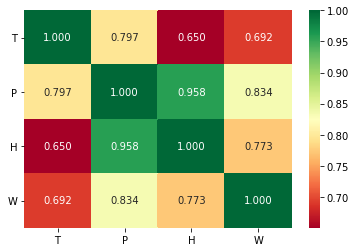

In [6]:
#heatmap for cosine similarity

plt.figure()
sns.heatmap(cos_sim,
            annot=True,
            fmt='0.3f',
            cmap='RdYlGn',
            yticklabels=df_norm.columns,
            xticklabels=df_norm.columns
           )
plt.yticks(rotation=0)
plt.show()

In [7]:
#Exercise 2
df_rm

array([[ 75.9715, -30.8837,  -3.4356,   6.1754],
       [-30.8837,  21.7457, -11.7665,  11.4336],
       [ -3.4356, -11.7665,  23.6877, -36.5359],
       [  6.1754,  11.4336, -36.5359,  78.6051]])

In [8]:
#calculate SVD

U, S, V = nla.svd(df_rm)
U, S, V

(array([[ 0.07723883,  0.90997641,  0.29137013,  0.28474644],
        [ 0.16476804, -0.41400934,  0.60000753,  0.66440855],
        [-0.44796564,  0.02154482, -0.59784472,  0.66441275],
        [ 0.87533562,  0.00866106, -0.4446078 ,  0.18983268]]),
 array([9.99999799e+01, 9.00000024e+01, 9.99998795e+00, 1.00297296e-02]),
 array([[ 0.07723883,  0.16476804, -0.44796564,  0.87533562],
        [ 0.90997641, -0.41400934,  0.02154482,  0.00866106],
        [ 0.29137013,  0.60000753, -0.59784472, -0.4446078 ],
        [ 0.28474644,  0.66440855,  0.66441275,  0.18983268]]))

In [9]:
#Construct the rank 3 approximation to df_rm

S1 = np.zeros(df_rm.shape)
np.fill_diagonal(S1, S)

# Getting the 3 rows, columns
k = 3
Uk = U[:, :k]
Sk = S1[:k, :k]
Vk = V[:k, :]

#Constructing the approximation
df_rm_k = Uk.dot(Sk.dot(Vk))
df_rm_k

array([[ 75.97068678, -30.8855975 ,  -3.43749752,   6.17485785],
       [-30.8855975 ,  21.74127249, -11.77092754,  11.43233499],
       [ -3.43749752, -11.77092754,  23.68327243, -36.53716502],
       [  6.17485785,  11.43233499, -36.53716502,  78.60473856]])

In [10]:
#Find the differences between 2 matrices using matrix norm called Frobenius norm

a = nla.norm(df_rm - df_rm_k, 2)
b = nla.norm(df_rm - df_rm_k, 'fro')
a,b

(0.010029729604406967, 0.010029729604406967)

In [11]:
#Try the same thing with rank 2 approx

k = 2
Uk = U[:, :k]
Sk = S1[:k, :k]
Vk = V[:k, :]

#Constructing the approximation
df_rm_k = Uk.dot(Sk.dot(Vk))
df_rm_k

a = nla.norm(df_rm - df_rm_k, 2)
b = nla.norm(df_rm - df_rm_k, 'fro')
a,b

(9.999987953924203, 9.999992983702793)

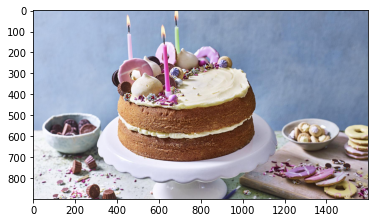

In [12]:
#Exerciuse 3
plt.figure()
plt.imshow(img)

array([[196.3189, 196.3189, 196.3189, ..., 144.3241, 146.3239, 146.3239],
       [196.3189, 196.3189, 196.3189, ..., 140.3245, 141.3244, 142.3243],
       [196.3189, 196.3189, 196.3189, ..., 141.3244, 142.3243, 143.3242],
       ...,
       [234.1059, 230.1063, 226.1067, ..., 136.894 , 138.1219, 144.3493],
       [223.107 , 216.1077, 212.1081, ..., 147.8929, 147.121 , 150.3487],
       [217.1076, 207.1086, 202.1091, ..., 158.8918, 159.1198, 159.3478]])

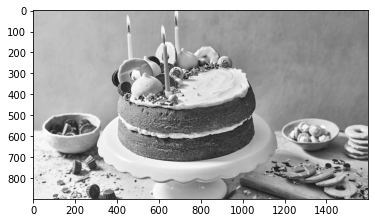

In [13]:
#converting to graxscale

def rgb2gray(rgb):
    #return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
    return rgb[...,:3].dot([0.2989, 0.5870, 0.1140])

img_gs = rgb2gray(img)

plt.figure()
plt.imshow(img_gs, cmap='gray')

img_gs

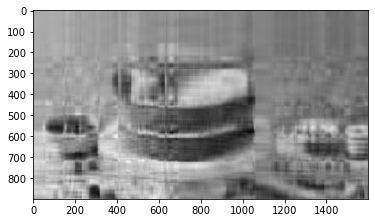

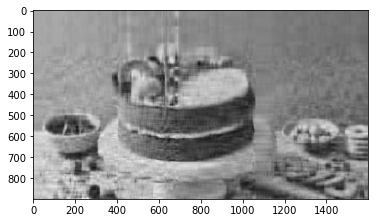

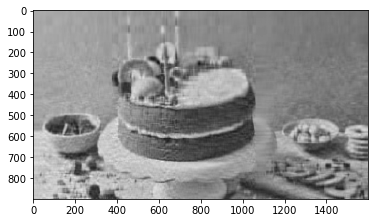

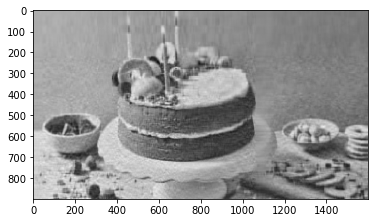

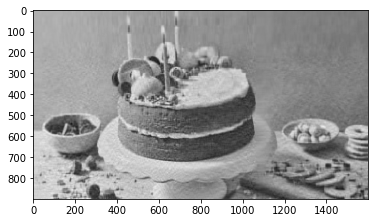

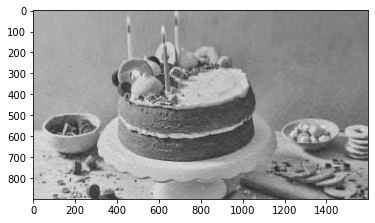

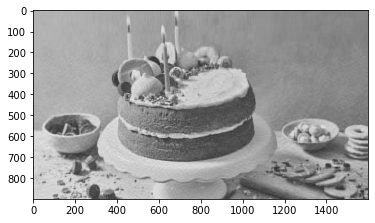

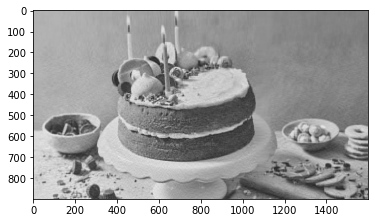

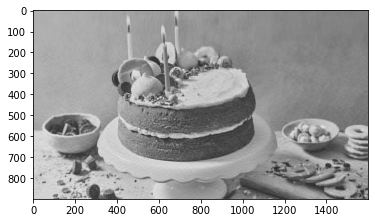

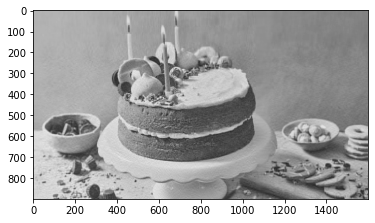

In [14]:
#image approx - 10 pics

U, S, V = nla.svd(img_gs)

for k in range(10, 110, 10):
    Uk = U[:, :k]
    Sk = np.zeros((k ,k))
    np.fill_diagonal(Sk, S[:k])
    Vk = V[:k, :]
    
    #Constructing the approximation
    img_low_rank = Uk.dot(Sk.dot(Vk))
    
    #Show the image
    plt.imshow(img_low_rank, cmap='gray')
    plt.show()
    
#lowest I would use: 50